In [2]:
#Import packages
import numpy as np 
import pandas as pd 
from warnings import filterwarnings
filterwarnings("ignore")
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
#Read Data
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
#Get number of rows and columns
df.shape

(545, 13)

In [6]:
#Change price position to be last column  
columns = df.columns.tolist()
columns.append(columns.pop(columns.index("price")))
df = df[columns]
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


In [7]:
#Check datatypes, unique values and null values
pd.DataFrame({"Dtype": df.dtypes, "Num_Unique": df.nunique(), "Null_values": df.isnull().sum(),
              "Null_Ratio": df.isnull().sum() / df.shape[0]}).T

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
Dtype,int64,int64,int64,int64,object,object,object,object,object,int64,object,object,int64
Num_Unique,284,6,4,4,2,2,2,2,2,4,2,3,219
Null_values,0,0,0,0,0,0,0,0,0,0,0,0,0
Null_Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#Change datatypes to category
cols_to_change = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea","furnishingstatus"]
df[cols_to_change] = df[cols_to_change].astype('category')

In [9]:
pd.DataFrame({"Dtype": df.dtypes}).T

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
Dtype,int64,int64,int64,int64,category,category,category,category,category,int64,category,category,int64


In [10]:
#Check duplicates
print(df.duplicated().sum())

0


In [11]:
#Get main data of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0


In [12]:
#Get main data of categorical columns
df.describe(include=["category", "object"]).T

,count,unique,top,freq
mainroad,545,2,yes,468
guestroom,545,2,no,448
basement,545,2,no,354
hotwaterheating,545,2,no,520
airconditioning,545,2,no,373
prefarea,545,2,no,417
furnishingstatus,545,3,semi-furnished,227


<Axes: xlabel='price', ylabel='Density'>

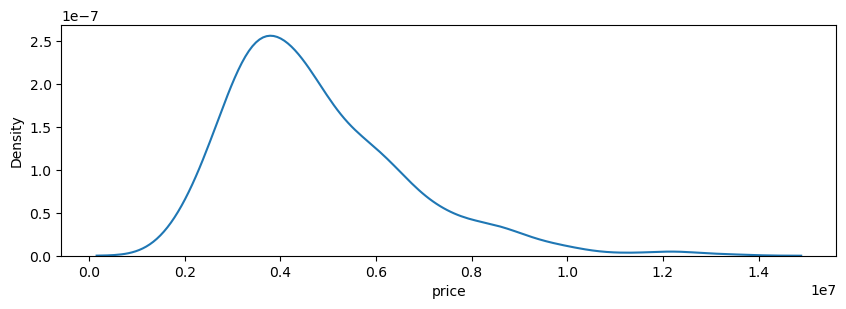

In [13]:
plt.figure(figsize=(10,3))
sns.kdeplot(df["price"])

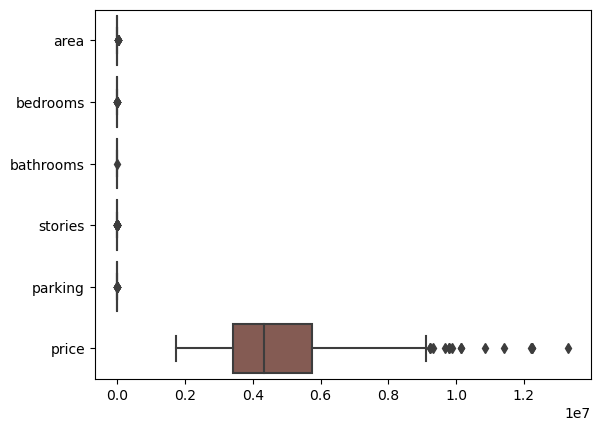

In [14]:
#Check outliers in price
sns.boxplot(df, orient="h")
plt.show()

In [15]:
#Manage outliers of numerical columns 
numerical_cols = df.select_dtypes("number").columns
for col in numerical_cols:
    Q1 = np.quantile(df[col], .25)
    Q3 = np.quantile(df[col], .75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    upper_outlier_values = df[df[col] > upper][col].values
    lower_outlier_values = df[df[col] < lower][col].values
    df[col] = df[col].replace(upper_outlier_values, upper)
    df[col] = df[col].replace(lower_outlier_values, lower)
    
    print(f"Lower bound of Column {col} = {lower}")
    print(f"Upper bound of Column {col} = {upper}")
    print(df[col].min())
    print(df[col].max())

Lower bound of Column area = -540.0
Upper bound of Column area = 10500.0
1650
10500
Lower bound of Column bedrooms = 0.5
Upper bound of Column bedrooms = 4.5
1.0
4.5
Lower bound of Column bathrooms = -0.5
Upper bound of Column bathrooms = 3.5
1.0
3.5
Lower bound of Column stories = -0.5
Upper bound of Column stories = 3.5
1.0
3.5
Lower bound of Column parking = -1.5
Upper bound of Column parking = 2.5
0.0
2.5
Lower bound of Column price = -35000.0
Upper bound of Column price = 9205000.0
1750000
9205000


<Axes: xlabel='price', ylabel='prefarea'>

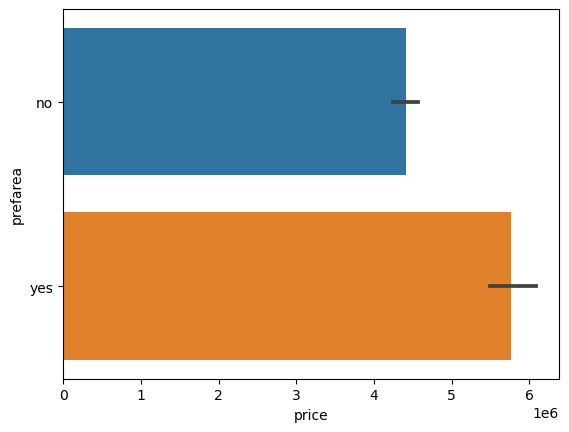

In [16]:
#Check relation between price and prefarea
sns.barplot(x= df["price"], y= df["prefarea"], data= df)

<Axes: xlabel='price', ylabel='furnishingstatus'>

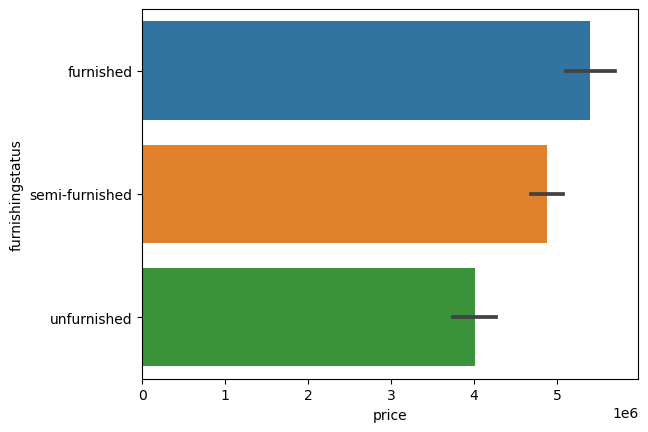

In [17]:
#Check relation between price and furnishingstatus
sns.barplot(x= df["price"], y= df["furnishingstatus"], data= df)

<Axes: xlabel='price', ylabel='mainroad'>

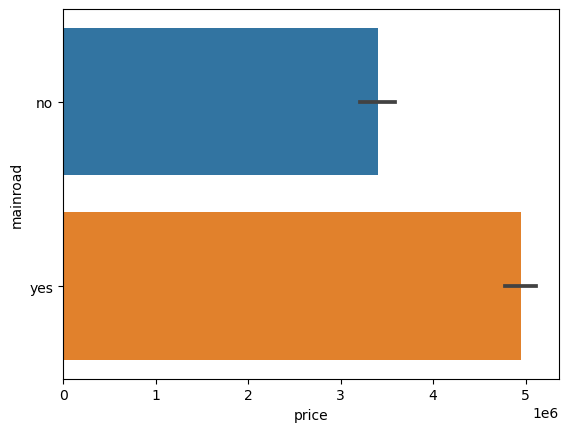

In [18]:
#Check relation between price and mainroad
sns.barplot(x= df["price"], y= df["mainroad"], data= df)

<Axes: xlabel='airconditioning', ylabel='hotwaterheating'>

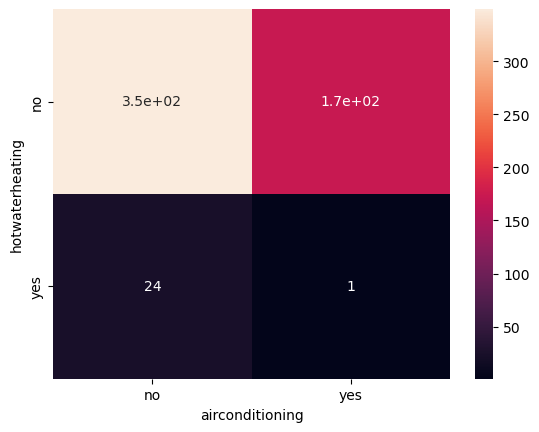

In [19]:
#Check relation between hotwaterheating and airconditioning
agg_heating_conditioning  = df.pivot_table(index="hotwaterheating", columns="airconditioning", values="area", aggfunc=len)
sns.heatmap(agg_heating_conditioning, annot=True)

In [20]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = df.select_dtypes("number").columns
scaler.fit(df[numerical_cols])
df[numerical_cols] = scaler.transform(df[numerical_cols])
df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,0.651977,0.857143,0.4,0.8,yes,no,no,no,yes,0.8,yes,furnished,1.00000
1,0.825989,0.857143,1.0,1.0,yes,no,no,no,yes,1.0,no,furnished,1.00000
2,0.938983,0.571429,0.4,0.4,yes,no,yes,no,no,0.8,yes,semi-furnished,1.00000
3,0.661017,0.857143,0.4,0.4,yes,no,yes,no,yes,1.0,yes,furnished,1.00000
4,0.651977,0.857143,0.0,0.4,yes,yes,yes,no,yes,0.8,no,furnished,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.152542,0.285714,0.0,0.0,yes,no,yes,no,no,0.8,no,unfurnished,0.00939
541,0.084746,0.571429,0.0,0.0,no,no,no,no,no,0.0,no,semi-furnished,0.00230
542,0.222599,0.285714,0.0,0.0,yes,no,no,no,no,0.0,no,unfurnished,0.00000
543,0.142373,0.571429,0.0,0.0,no,no,no,no,no,0.0,no,furnished,0.00000


In [21]:
pd.DataFrame(df.select_dtypes("category").nunique()).T

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,2,2,2,2,2,2,3


In [22]:
#Encoding
df = pd.get_dummies(df, columns= ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"])
df

,area,bedrooms,bathrooms,stories,parking,price,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.651977,0.857143,0.4,0.8,0.8,1.00000,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,0.825989,0.857143,1.0,1.0,1.0,1.00000,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,0.938983,0.571429,0.4,0.4,0.8,1.00000,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,0.661017,0.857143,0.4,0.4,1.0,1.00000,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,0.651977,0.857143,0.0,0.4,0.8,1.00000,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.152542,0.285714,0.0,0.0,0.8,0.00939,0,1,1,0,...,1,1,0,1,0,1,0,0,0,1
541,0.084746,0.571429,0.0,0.0,0.0,0.00230,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
542,0.222599,0.285714,0.0,0.0,0.0,0.00000,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
543,0.142373,0.571429,0.0,0.0,0.0,0.00000,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0


In [23]:
df.shape

(545, 21)

In [24]:
df.head()

,area,bedrooms,bathrooms,stories,parking,price,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.651977,0.857143,0.4,0.8,0.8,1.0,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,0.825989,0.857143,1.0,1.0,1.0,1.0,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,0.938983,0.571429,0.4,0.4,0.8,1.0,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,0.661017,0.857143,0.4,0.4,1.0,1.0,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,0.651977,0.857143,0.0,0.4,0.8,1.0,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0


In [25]:
#Linear regression
from sklearn.linear_model import LinearRegression
x = df["area"]
y = df["price"]
class Linear_Regression:
    def __init__(self, lr=.01, num_iterations=1000):
        self.lr = lr 
        self.num_iterations = num_iterations
        self.a = np.random.rand()
        self.b = np.random.rand()
        
    def y_hat(self, x):
        return self.a * x + self.b
    
    def MSE(self, y, y_pred):
        return np.mean((y - y_pred)**2)
    
    def GD(self, x, y, y_pred):
        n = len(x)
        d_err_a = (-2 / n) * sum(x * (y - y_pred))
        d_err_b = (-2 / n) * sum(y - y_pred)
        self.a = self.a - self.lr * d_err_a
        self.b = self.b - self.lr * d_err_b
    
    def fit(self, x, y):
        for i in range(self.num_iterations):
            y_pred = self.y_hat(x)

            err = self.MSE(y, y_pred)
            
            self.GD(x, y, y_pred)
            

            if err < .01:
                print(i)
                print(err)
                break
    
    def predict(self, x):
        return self.y_hat(x)

In [26]:
model = Linear_Regression(lr=.1, num_iterations=1000)
model.fit(x, y)
y_pred = model.predict(x)
model.MSE(y, y_pred)

0.037921257191963965